In [ ]:
import pandas as pd
import seaborn as sns
linknotas = 'https://raw.githubusercontent.com/elasComputacao/raio-x-dados/main/data/dados-brutos/historico_alunos_raiox.csv'
dados = pd.read_csv(linknotas)
df = pd.DataFrame(dados)
pd.set_option('display.max_columns', None)
disciplina_desejada = 'TEORIA DA COMPUTAÇÃO'
result = df.loc[df['nome_disciplina'] == disciplina_desejada]
result

Eu sumo, foi encontrado uma grande quantidade de aprovados(aproximadamente 80%), algums períodos tem uma base de dados um pouco pequena, mas dá pra ter uma base geral das aprovações por perido na nova grade(2012.2 até 2019.1).
No mais, para comentarios de algum periodo especifico, tem um comentário nele com algums entendimentos gerais.

Aprovado               1914
Reprovado               394
Reprovado por Falta     192
Trancado                 68
Em Curso                 65
Cancelado                 9
Name: situacao, dtype: int64


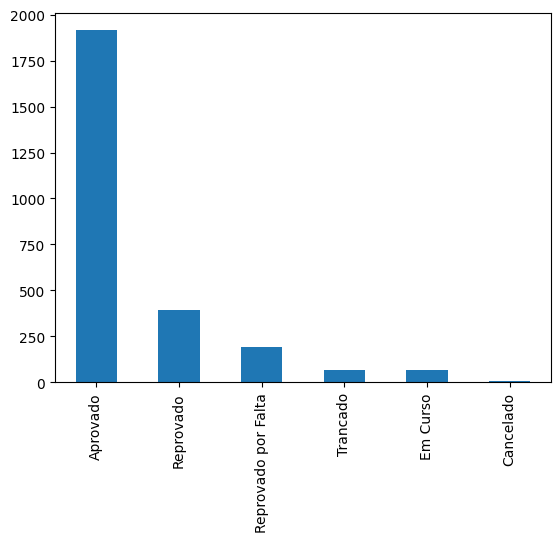

In [2]:
result['situacao'].value_counts().plot.bar()
print (result['situacao'].value_counts())

As informações indicam que, em média, 8 a cada 10 estudantes que realmente pagam a cadeira são aprovados, mostrando que tem um alto indice de aprovação em relação a outras cadeiras do curso.

In [3]:
teste = result.query("codigo_curriculo == 2017")
teste.groupby('codigo_curriculo')['situacao'].value_counts().reset_index(name='contagem')
teste.groupby('periodo_ingresso')['situacao'].value_counts().reset_index(name='contagem')

,periodo_ingresso,situacao,contagem
0,2012.2,Reprovado,3
1,2012.2,Aprovado,2
2,2012.2,Reprovado por Falta,1
3,2013.1,Aprovado,3
4,2013.1,Reprovado,1
5,2013.2,Reprovado,4
6,2013.2,Aprovado,3
7,2013.2,Trancado,3
8,2013.2,Reprovado por Falta,2
9,2013.2,Em Curso,1


In [4]:
final = teste.groupby('periodo_ingresso')['situacao'].value_counts().reset_index(name='contagem')
f = final.value_counts().to_frame()
del f[0]
f = f.sort_values(by='periodo_ingresso')
f

Empty DataFrame
Columns: []
Index: [(2012.2, Aprovado, 2), (2012.2, Reprovado por Falta, 1), (2012.2, Reprovado, 3), (2013.1, Aprovado, 3), (2013.1, Reprovado, 1), (2013.2, Aprovado, 3), (2013.2, Em Curso, 1), (2013.2, Reprovado, 4), (2013.2, Reprovado por Falta, 2), (2013.2, Trancado, 3), (2014.1, Aprovado, 10), (2014.2, Cancelado, 1), (2014.2, Reprovado, 5), (2014.2, Reprovado por Falta, 1), (2014.2, Aprovado, 15), (2015.1, Aprovado, 54), (2015.1, Reprovado, 3), (2015.2, Aprovado, 50), (2015.2, Cancelado, 1), (2015.2, Reprovado, 8), (2015.2, Reprovado por Falta, 3), (2016.1, Reprovado, 10), (2016.1, Aprovado, 50), (2016.1, Trancado, 1), (2016.1, Reprovado por Falta, 4), (2016.2, Em Curso, 3), (2016.2, Reprovado, 15), (2016.2, Reprovado por Falta, 2), (2016.2, Trancado, 4), (2016.2, Aprovado, 57), (2017.1, Reprovado por Falta, 1), (2017.1, Aprovado, 47), (2017.1, Cancelado, 1), (2017.1, Em Curso, 11), (2017.2, Em Curso, 20), (2017.2, Reprovado por Falta, 2), (2017.2, Trancado, 1), (2017.2, Reprovado, 1), (2017.2, Aprovado, 31), (2018.1, Aprovado, 5), (2018.1, Em Curso, 23), (2018.2, Aprovado, 6), (2018.2, Em Curso, 7), (2018.2, Reprovado por Falta, 2), (2019.1, Aprovado, 3), (2019.2, Aprovado, 7)]

Text(0.5, 1.0, '2012.2')

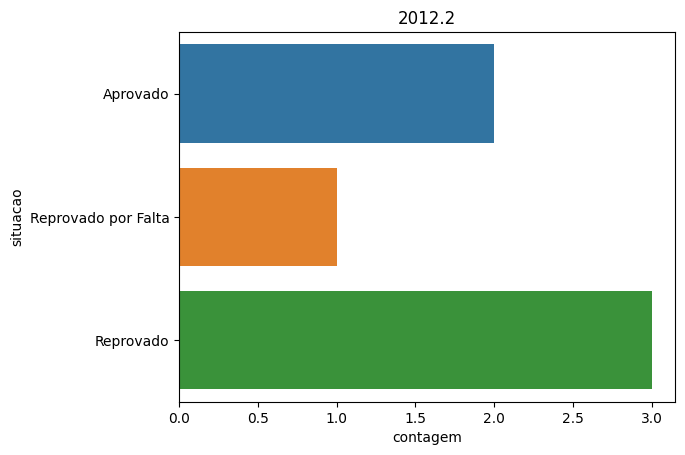

In [ ]:
periodo = f.query("periodo_ingresso == 2012.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2012.2')

2012.2: Dos 5 que realmente fizeram a cadeira apenas 2 foram aprovados, um dado relativamente ruim já que foram reprovados mais que a maioria, mas pode ser relevado devido a pequena quantidade de pessoas e ser o começo da diciplina no plano de curso

Text(0.5, 1.0, '2013.1')

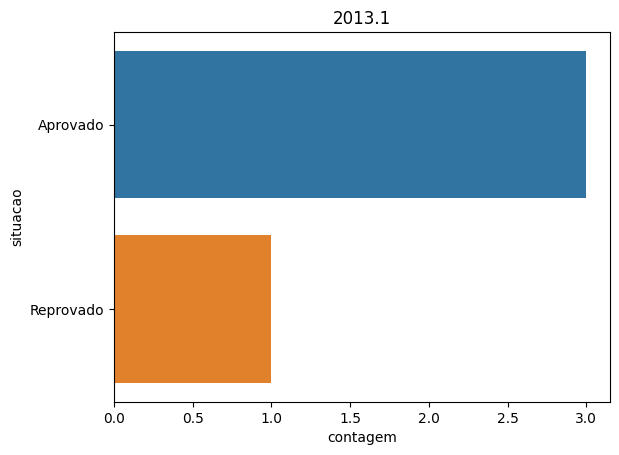

In [ ]:
periodo = f.query("periodo_ingresso == 2013.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2013.1')

2013.1: Ao contrario de 2012.2 mostra uma boa crescente na quantidade de aprovados

Text(0.5, 1.0, '2013.2')

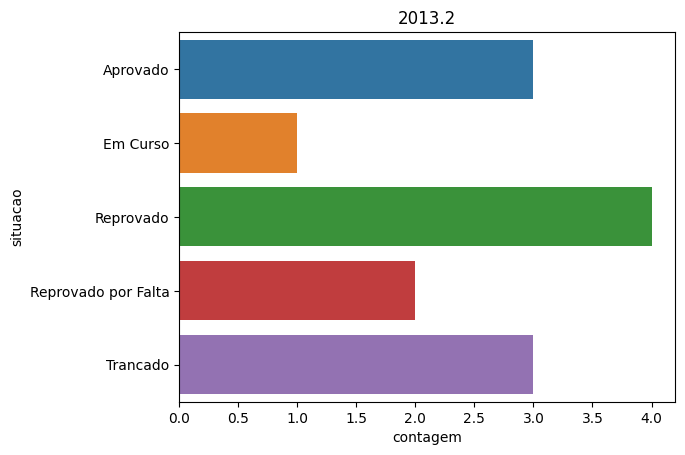

In [ ]:
periodo = f.query("periodo_ingresso == 2013.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2013.2')

2023.2: São dados mais organicos, já que mostram a variedade de casos, mas mesmo assim é preocupante a quantidade de reprovados em relação ao geral

Text(0.5, 1.0, '2014.1')

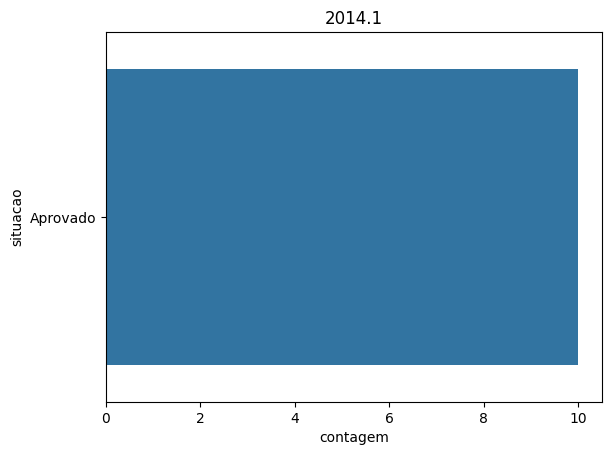

In [ ]:
periodo = f.query("periodo_ingresso == 2014.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2014.1')

2014.1 : Ao contrario do periodo passado os dados desse periodo parecem bem secos, e todos daqui foram aprovados, provavelmente uma inconsistencia no banco de dados

Text(0.5, 1.0, '2014.2')

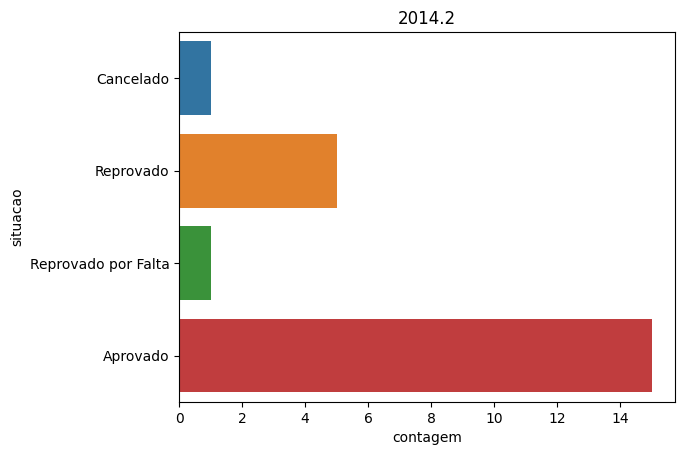

In [ ]:
periodo = f.query("periodo_ingresso == 2014.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2014.2')
#Segue uma crescente, mas dessa vez com dados mais organicos, com três a cada quatro alunos que realmente tentaram a materia sendo aprovados

2014.2: Segue uma crescente, mas dessa vez com dados mais organicos, com três a cada quatro alunos que realmente tentaram a materia sendo aprovados, uma boa proporção

Text(0.5, 1.0, '2015.1')

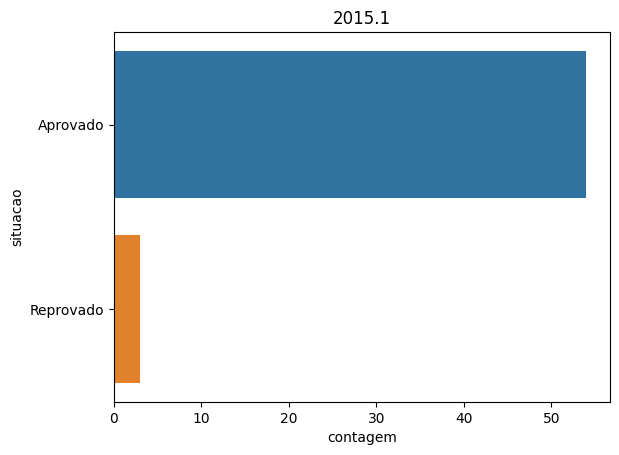

In [ ]:
periodo = f.query("periodo_ingresso == 2015.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2015.1')

2015.1: Aproveitamento muito bom de alunos aprovados, mas também pode-se perceber a tendencia de peridos .1 em serem mais constantes e nao terem trancamentos ou reprovações por falta

Text(0.5, 1.0, '2015.2')

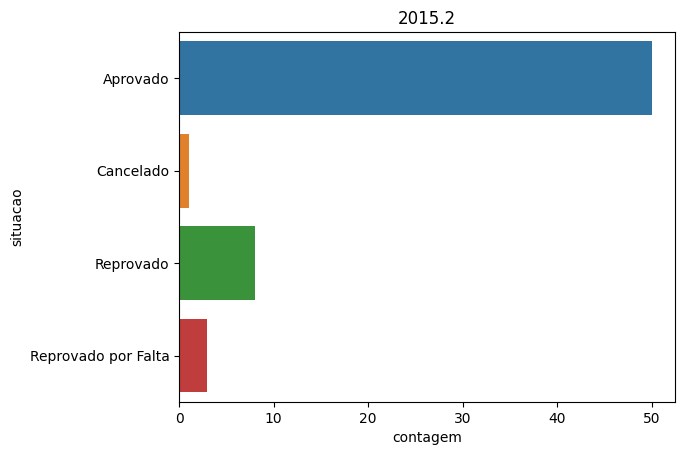

In [ ]:
periodo = f.query("periodo_ingresso == 2015.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2015.2')

In [ ]:
2015.2: Gigantesca maioria dos alunos aprovados, como segue a crescente

Text(0.5, 1.0, '2016.1')

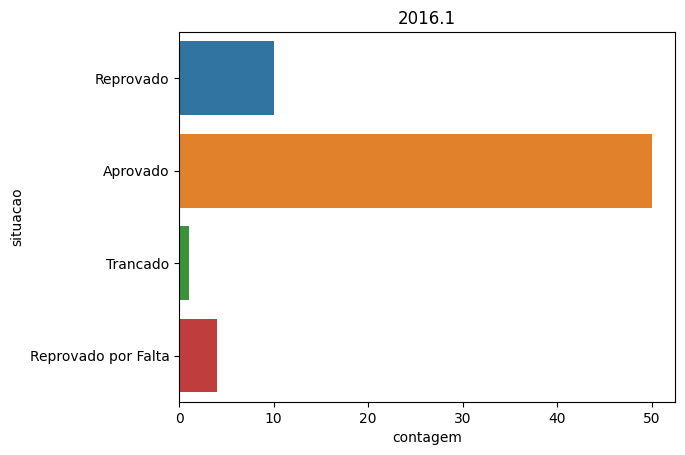

In [ ]:
periodo = f.query("periodo_ingresso == 2016.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2016.1')

2016.1: assim como 2015.2, grande parte dos alunos aprovados

Text(0.5, 1.0, '2016.2')

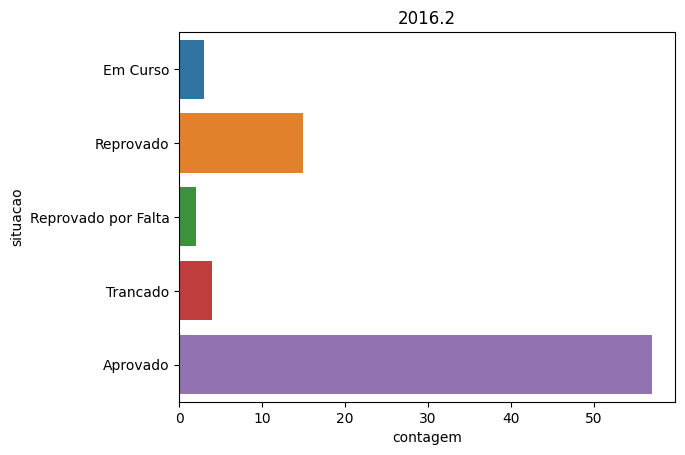

In [ ]:
periodo = f.query("periodo_ingresso == 2016.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2016.2')

2016.2: Segue a crescente de alunos aprovados, mantendo a mesma razão de aprovados e reprovados

Text(0.5, 1.0, '2017.1')

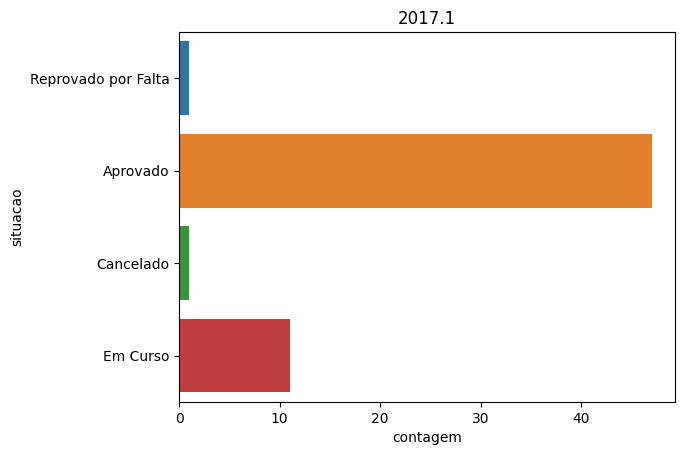

In [ ]:
periodo = f.query("periodo_ingresso == 2017.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2017.1')

2017.1: Nesse pontos os dados estão bem estaveis e consolidados, quantidade alta de aprovados

Text(0.5, 1.0, '2017.2')

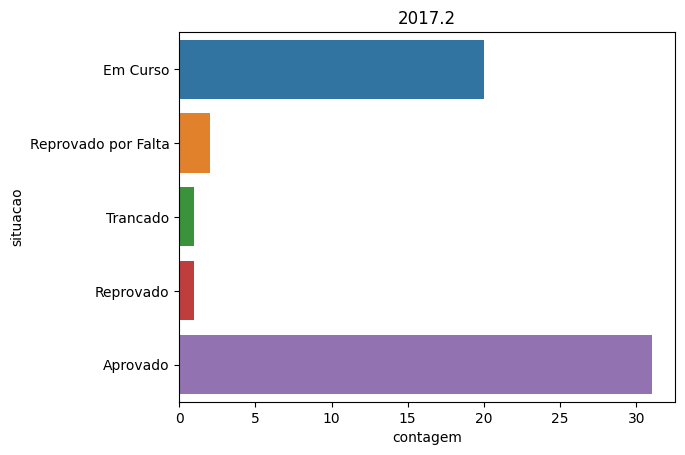

In [ ]:
periodo = f.query("periodo_ingresso == 2017.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2017.2')

2017.2: Até aqui o período com dados mais organicos, uma quantidade boa de alunos e uma quantidade bem pequena de reprovados

Text(0.5, 1.0, '2018.1')

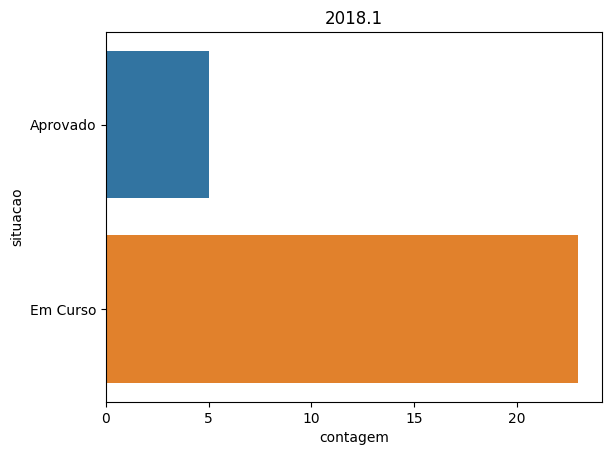

In [ ]:
periodo = f.query("periodo_ingresso == 2018.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2018.1')

2018.1: Começa a perceber a crescente de lunos em curso nos dados, fazendo com que a anaise não seja 100% precisa, mas é curioso notar a ausência de reprovações

Text(0.5, 1.0, '2018.2')

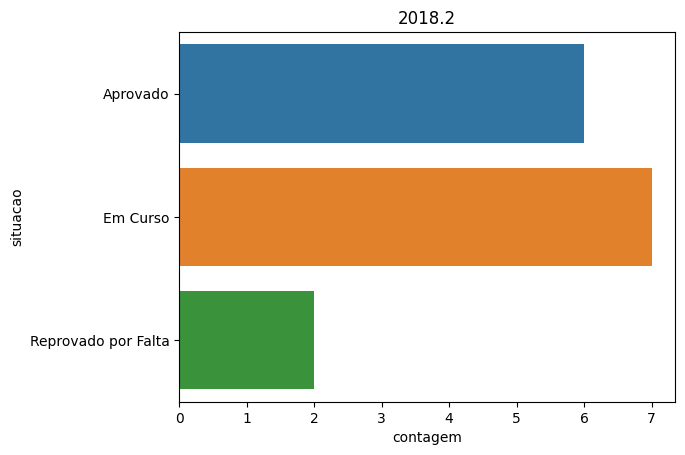

In [ ]:
periodo = f.query("periodo_ingresso == 2018.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2018.2')

2018.2: Um pouco menor a razão entre aprovados e em curso se comparado com 18.1, mas ainda sim bastante alunos em curso, curioso notar 2 individuos com reprovação por falta

Text(0.5, 1.0, '2019.1')

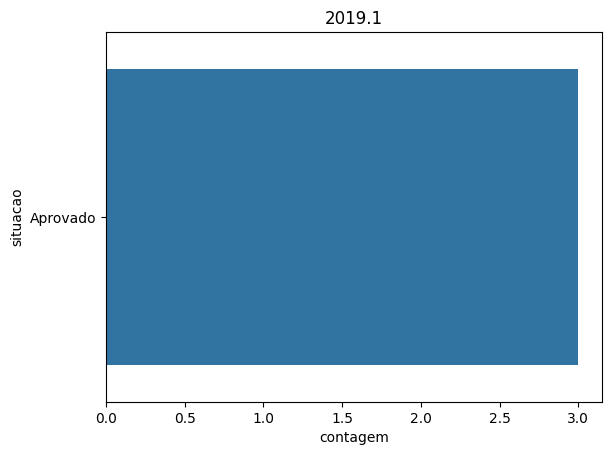

In [ ]:
periodo = f.query("periodo_ingresso == 2019.1").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2019.1')

2019.1: Todos os 3 alunos que fizeram a disciplina passaram, dados insulficientes, sem muito a comentar

Text(0.5, 1.0, '2019.2')

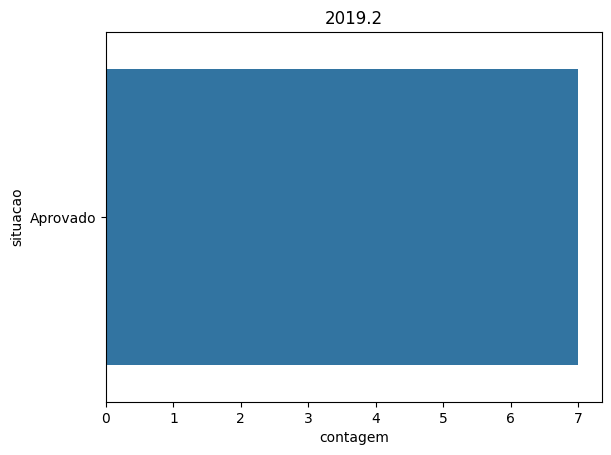

In [ ]:
periodo = f.query("periodo_ingresso == 2019.2").reset_index()
periodo = periodo.reset_index()
periodo = periodo[  [  'contagem','situacao'  ] ]
sns.barplot( data=periodo, x='contagem', y= 'situacao').set_title('2019.2')

2019.2: Assim como 2019.1, todos que pagaram a disciplina passaram